In [85]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [86]:
v_input = np.array([0.00, 0.14, 0.26, 0.42, 0.55,
                    0.69, 0.83, 0.97, 1.09, 1.22,
                    1.36, 1.51, 1.63, 1.79, 1.94,
                    2.06, 2.20, 2.34, 2.48, 2.61,
                    2.75, 2.89, 3.03, 3.16, 3.30],
                   dtype=np.float64)

v_adc = np.array([0.00, 0.08, 0.25, 0.49, 0.68,
                  0.91, 1.11, 1.35, 1.58, 1.70,
                  1.90, 2.13, 2.32, 2.62, 2.97,
                  3.29, 3.30, 3.30, 3.30, 3.30,
                  3.30, 3.30, 3.30, 3.30, 3.30],
                 dtype=np.float64)

## Caso I

In [87]:
# Exercise E4.4
def func1(x, a, b, c, d):
    return a * x ** 3 + b * x ** 2 + c * x + d

# Exercise E4.5
# def func1(x, a, b, c, d, e, f):
#     return a * x**5 + b * x**4 + c * x**3 + d * x**2 + e * x + f

In [88]:
popt, pcov = curve_fit(func1, v_adc, v_input)

max_error = np.max(np.abs(func1(v_adc, *popt) - v_input))
rms_error = np.sqrt(np.sum(np.power(func1(v_adc, *popt) - v_input, 2)) / v_adc.shape[0])

print(f"Regression coefficients: {popt}")
print(f"Max error: {max_error:.3f}")
print(f"Quadratic mean error: {rms_error:.3f}")

Regression coefficients: [ 0.09512482 -0.39972547  1.09094326  0.00281181]
Max error: 0.632
Quadratic mean error: 0.256


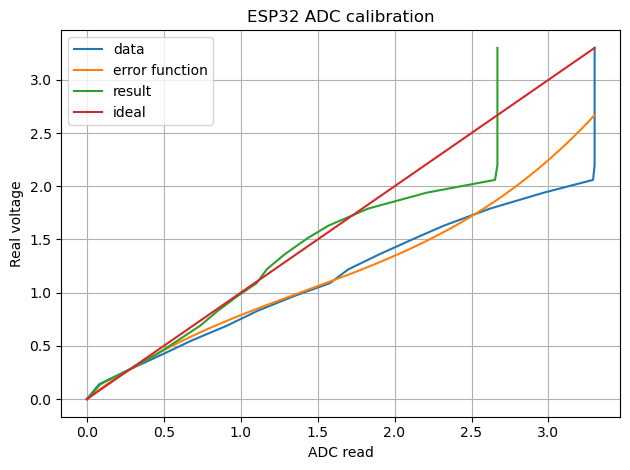

In [89]:
x = np.linspace(0.00, 3.30, 1000)

plt.plot(v_adc, v_input, label="data")

plt.plot(x, func1(x, *popt), label="error function")

plt.plot(func1(v_adc, *popt), v_input, label="result")

plt.plot(x, x, label="ideal")

plt.title("ESP32 ADC calibration")
plt.xlabel("ADC read")
plt.ylabel("Real voltage")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

## Caso II

In [90]:
# Example E4.5
def func2(x, a, b, c):
    return a * x ** 2 + b * x + c

# Exercise E4.6
# def func2(x, a, b, c, d, e):
#     return a * x**4 + b * x**3 + c * x**2 + d * x + e


# Exercise E4.7
# def func2(x, a, b, c):
#     return a * np.exp(b * (x + c)**2)


# Exercise E4.8
# def func2(x, a, b, c):
#     return a * np.abs(x - b) + c

In [91]:
error = v_adc - v_input

popt, pcov = curve_fit(func2, v_adc, error)

max_error = np.max(np.abs(func2(v_adc, *popt) - error))
rms_error = np.sqrt(np.sum(np.power(func2(v_adc, *popt) - error, 2)) / v_adc.shape[0])

print(f"Regression coefficients: {popt}")
print(f"Max error: {max_error:.3f}")
print(f"Quadratic mean error: {rms_error:.3f}")

Regression coefficients: [-0.09257384  0.54451686 -0.13335078]
Max error: 0.655
Quadratic mean error: 0.266


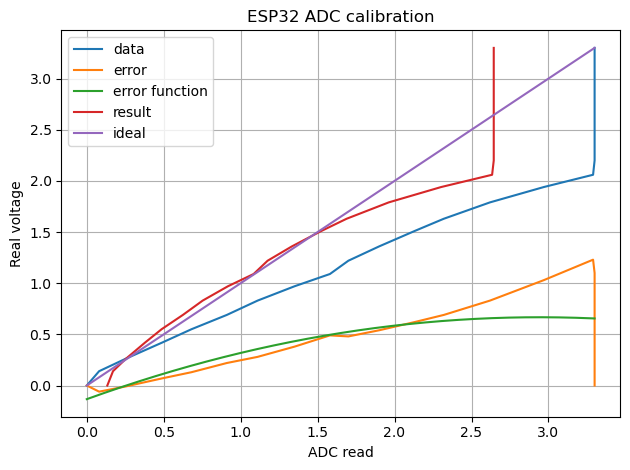

In [92]:
x = np.linspace(0.00, 3.30, 1000)

plt.plot(v_adc, v_input, label="data")
plt.plot(v_adc, error, label="error")

plt.plot(x, func2(x, *popt), label="error function")

plt.plot(v_adc - func2(v_adc, *popt), v_input, label="result")

plt.plot(x, x, label="ideal")

plt.title("ESP32 ADC calibration")
plt.xlabel("ADC read")
plt.ylabel("Real voltage")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()